In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


# Read The LME Spot Price Data

In [4]:
metal = 'LMCADY'
price = pd.read_csv(metal+'.csv')
price['Index'] =  pd.to_datetime(price['Index'])

# Create return over several time horizon

In [5]:
price['return_1d'] = ((price['LMCADY'] / price['LMCADY'].shift(1)) -1)*100
price['return_3d'] = ((price['LMCADY'] / price['LMCADY'].shift(3)) -1)*100
price['return_5d'] = ((price['LMCADY'] / price['LMCADY'].shift(5)) -1)*100
price['return_7d'] = ((price['LMCADY'] / price['LMCADY'].shift(7)) -1)*100
price['return_10d'] = ((price['LMCADY'] / price['LMCADY'].shift(10)) -1)*100
price['return_15d'] = ((price['LMCADY'] / price['LMCADY'].shift(15)) -1)*100
price['return_20d'] = ((price['LMCADY'] / price['LMCADY'].shift(20)) -1)*100

# Read the Baidu Sentiment Score through analyzing each news title from Chinese new sources

In [122]:
sentiment = pd.read_csv('trial.csv')
sentiment['Score'] = sentiment['Sentiment_article']*100
#sentiment.drop(['Cu_action','title','Sentiment','Sentiment_article'],axis=1,inplace =True)

In [123]:
sentiment['date'] = sentiment['date'].apply(lambda x : pd.to_datetime(x).floor('1D'))

In [124]:
def analyze_daily_freq(date):
    result =[]
    current_day = 0 
    current_freq = 0
    for day in date:
        if current_day == day:
            current_freq += 1
        else:
            result.append([current_day,current_freq])
            current_day = day
            current_freq = 1
    result.append([current_day,current_freq])
    final = pd.DataFrame(result[1:],columns=['Date','Freq'])
    final['Date'] =  pd.to_datetime(final['Date'])
    return final

In [125]:
trial = sentiment[sentiment['date'] == pd.to_datetime('2019-03-14')]

In [126]:
trial

,title,date,Cu_action,Sentiment,Sentiment_article,Score
19563,沪铜探底回升 多头再度发力,2019-03-14,['* 外盘走势：亚市伦铜振荡反弹，其中3个月伦铜日内交投于7231-7150美元/吨，为四...,"[{'positive_prob': 0.626601, 'confidence': 0.1...",0.115602,11.560168
19564,伦铜周五微幅下跌，但有望录得2009年来最大年度涨幅,2019-03-14,"['铜价的上涨动能有望令其录得2009年以来的最大年度涨幅', '今年铜价已经累计上涨逾30...","[{'positive_prob': 0.693468, 'confidence': 0.3...",0.098668,9.866761
19565,市场多头共振，伦铜连阳上行,2019-03-14,['* 铜价持续反弹，带动现货市场昨日一度被动补货，现货贴水也一度收窄，加之黑色间被带动拉涨...,"[{'positive_prob': 0.42228, 'confidence': 0.06...",-0.009575,-0.957534
19566,沪铜承压重挫 空方筹码增加,2019-03-14,['* 外盘走势：亚市伦铜承压下滑，其中3个月伦铜交投于6831-6725美元/吨，现交投于...,"[{'positive_prob': 0.117951, 'confidence': 0.7...",-0.289623,-28.962294
19567,铜大周期看涨越来越得到市场认同，但短期不具备直接突破基础,2019-03-14,"['需求弱限制铜价格回升，而精炼铜供应有限限制回落，短期铜价格滞涨滞跌', '这意味着，智利...","[{'positive_prob': 0.226962, 'confidence': 0.4...",0.167051,16.705107
19568,COMEX铜十六连阳，但后市恐难延续,2019-03-14,['操作上等待回调并持稳之后再行买入，激进者可适当短空'],"[{'positive_prob': 0.400699, 'confidence': 0.1...",-0.021758,-2.175844
19569,COMEX期铜周四连续第16个交易日上涨，延续有史以来的最长连涨走势,2019-03-14,"['中国是全球最大的铜消费国，今年迄今铜价上涨逾30%', '部分分析师称，铜价上涨反映出投...","[{'positive_prob': 0.795443, 'confidence': 0.5...",0.151414,15.141354
19570,红风筝狙击5万手铜大户 决战商品牛熊,2019-03-14,"['红风筝发现格林大华名下一个账户有五万手的铜多头后，认为这不是一笔小数目', '为了捍卫自...","[{'positive_prob': 0.217219, 'confidence': 0.5...",-0.029860,-2.986021
19571,2018年铜价易涨难跌,2019-03-14,"['宏观环境上，随着减产协议的执行，油市有望重塑平衡，油价的上涨也将为铜价提供强力支撑', ...","[{'positive_prob': 0.722845, 'confidence': 0.3...",0.110229,11.022870
19572,内外盘期铜携手连涨 铜市回调风险加大,2019-03-14,"['伦铜在15个交易日连续上涨后，涨幅累计已超过11%', '国内沪铜在伦铜圣诞节休市后，本...","[{'positive_prob': 0.543425, 'confidence': 0.1...",-0.026098,-2.609789


In [117]:
daily_freq = analyze_daily_freq(sentiment['date'])

In [118]:
daily_freq

,Date,Freq
0,2008-08-20,1
1,2008-08-21,1
2,2008-09-09,1
3,2008-09-11,1
4,2008-09-17,1
5,2008-10-06,1
6,2008-10-07,1
7,2008-10-15,1
8,2008-10-16,1
9,2008-10-28,1


# Create Indicator

Now we will create two indicators. 
1. First indicator will use the positive score - negative score, the larger the score, the more positive news will be. 
2. Second indicator will base on first indicator and times the confidence level in order to incorporate the factor related to confidence of the baidu api analysis into the indicator

Now we will aggregate the indicator score of all news happened in a day into one final score

In [14]:
def create_indicator(df,indi):
    result =[]
    current_day = 0 
    current_score = 0
    num = 1 
    for day,score in zip(df['date'],df[indi]):
        if current_day == day:
            current_score += score
            num +=1
        else:
            result.append([current_day,current_score/num])
            current_day = day
            current_score = score
            num = 1
    result.append([current_day,current_score/num])
    final = pd.DataFrame(result[1:],columns=['Date','Score'])
    final['Date'] =  pd.to_datetime(final['Date'])
    return final


# Experiment relationship between backward return ratio and indicator 

Through our observation, we realize that most of the data we have are analyst reports which summarize events that have happended in the past (ranging from days to weeks) and analyse the impact of those events. Therefore, we can say that the most positive the score, the more positive the analyts in China feel about the market. 

Thus, the purpose of the following section is to experiment and check how the score might be related to financial market. We will check the following relationship:

#### 1. Relationship between today indicator score and the price changes for past few days( percentage changes between T and T - k)
The higher the score, more analyst are positive about the future, there will be more positive news that happend in the past and those news increase investors' risk appetite. Thus, we can assume that the price of today has incorporated those factors under efficient market theory. In other word, we should see a higher score correlated to a posivite price movement in the past

#### 2. Relationship between today indicator score and the price changes for next few days( percentage changes between T and T + k)
After checking the validity of the score, We will use the score to see whehter it has any predictive value in return.

#### 3. Relationship between today indicator score and the volatility changes for next few days
After checking the validity of the score, We will use the score to see whehter it has any predictive value in volatility.

Combine Indicator and price into one dataframe

In [20]:
indicator2 = create_indicator(sentiment,'indi2')
price_indicator = indicator2.merge(price, left_on='Date', right_on='Index',how='inner')
price_indicator.drop('Date',axis=1,inplace = True)
price_indicator.rename(columns={'Index': 'Date'}, inplace=True)
price_indicator = price_indicator.reindex(index=price_indicator.index[::-1]).reset_index(drop = True)

In [22]:
def experiment_result(target,indicator,data):
    X = data[indicator].values
    X = np.reshape(X, (-1,1))
    data.plot.scatter(y =target,x=indicator,title = target +" vs "+indicator)
    print("Correlation is : " + str(data[indicator].corr(data[target])))
    target = data[target]
    model = linear_model.LinearRegression().fit(X,target)
    predicted = model.predict(X)
    plt.plot(data[indicator],predicted, 'r', label='fitted line')
    return

Correlation is : 0.019462127776626984


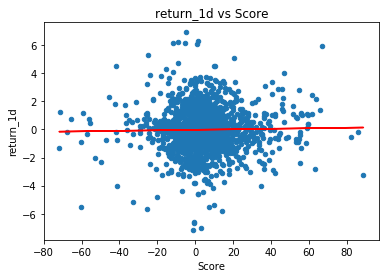

In [28]:
experiment_result('return_1d','Score',price_indicator)

Correlation is : 0.12103837375649575


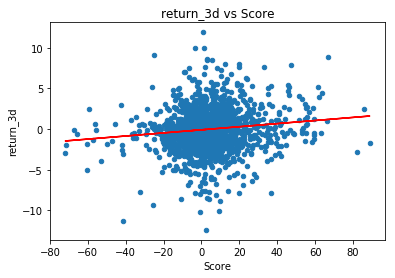

In [29]:
experiment_result('return_3d','Score',price_indicator)

Correlation is : 0.1393207904510138


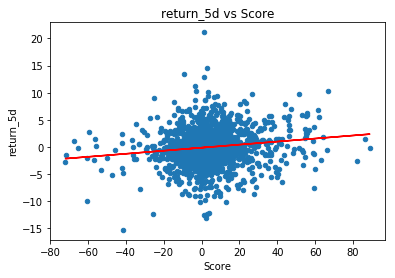

In [30]:
experiment_result('return_5d','Score',price_indicator)

Correlation is : 0.1414670163311531


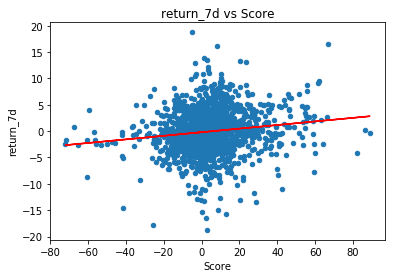

In [31]:
experiment_result('return_7d','Score',price_indicator)

Correlation is : 0.1409306322168886


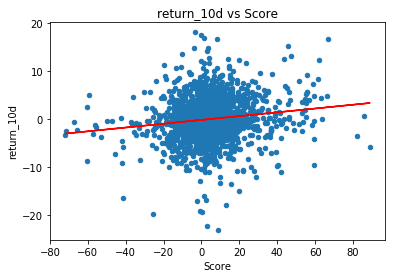

In [32]:
experiment_result('return_10d','Score',price_indicator)

## Conclusion  1
From the experiment above, we are safe to assume that the sentiment score has incorporated the impact of past events in it instead of just being a random numerical value. Therefore, it makes sense for us to continue to improve the sentiment score as well as use it to do prediction for return

# Experiment relationship between forward return ratio and indicator 

In [42]:
price_forward = price.copy()

In [43]:
price_forward['return_1d'] = price_forward['return_1d'].shift(-1)
price_forward['return_3d'] = price_forward['return_3d'].shift(-3)
price_forward['return_5d'] = price_forward['return_5d'].shift(-5)
price_forward['return_7d'] = price_forward['return_7d'].shift(-7)
price_forward['return_10d'] = price_forward['return_10d'].shift(-10)
price_forward['return_15d'] = price_forward['return_15d'].shift(-15)
price_forward['return_20d'] = price_forward['return_20d'].shift(-20)

In [52]:
price_indicator_forward = indicator2.merge(price_forward, left_on='Date', right_on='Index',how='inner')
price_indicator_forward.drop('Date',axis=1,inplace = True)
price_indicator_forward.rename(columns={'Index': 'Date'}, inplace=True)
price_indicator_forward = price_indicator_forward.dropna()
price_indicator_forward = price_indicator_forward.reindex(index=price_indicator_forward.index[::-1]).reset_index(drop = True)

Correlation is : -0.03133210560866708


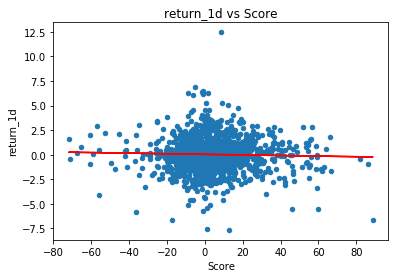

In [54]:
experiment_result('return_1d','Score',price_indicator_forward)

Correlation is : -0.024652051300263912


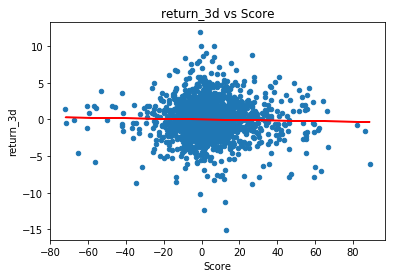

In [55]:
experiment_result('return_3d','Score',price_indicator_forward)

Correlation is : 0.02085778724221036


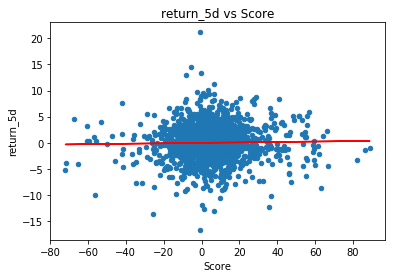

In [56]:
experiment_result('return_5d','Score',price_indicator_forward)

Correlation is : 0.036942059525794


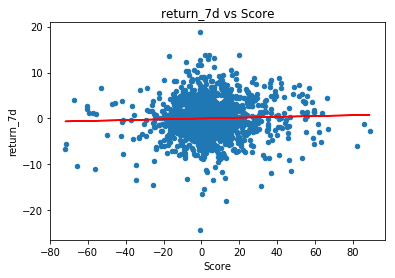

In [58]:
experiment_result('return_7d','Score',price_indicator_forward)

Correlation is : 0.05586749759724926


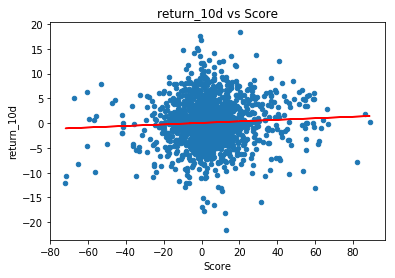

In [59]:
experiment_result('return_10d','Score',price_indicator_forward)

## Conclusion  2
From the experiment above, we can tell sentiment score has zero correlation with future return. However, we can't conclude that it has zero predictive value in it. We will do other testing in next section 

# Experiment relationship between Volatility and indicator 

In [60]:
vol = price[[u'Index', u'LMCADY', u'return_1d']].copy()

In [61]:
vol['Std'] = np.log(vol[u'return_1d'].rolling(10).std())

In [62]:
vol['std_1d'] = vol['Std'].shift(-1)
vol['std_3d'] = vol['Std'].shift(-3)
vol['std_5d'] = vol['Std'].shift(-5)
vol['std_7d'] = vol['Std'].shift(-7)
vol['std_10d'] = vol['Std'].shift(-10)

In [63]:
vol = vol.dropna()

In [65]:
vol_indicator = indicator2.merge(vol, left_on='Date', right_on='Index',how='inner')
vol_indicator.drop('Date',axis=1,inplace = True)

Correlation is : 0.05822914780506593


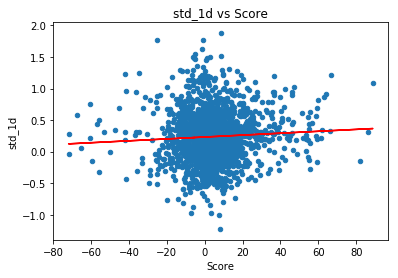

In [69]:
experiment_result('std_1d','Score',vol_indicator)

Correlation is : 0.051675162292571485


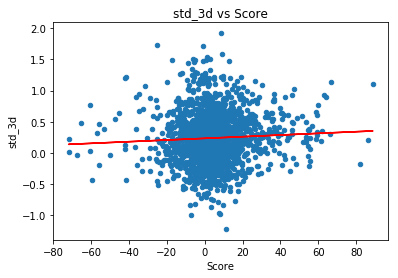

In [70]:
experiment_result('std_3d','Score',vol_indicator)

Correlation is : 0.0339548845475234


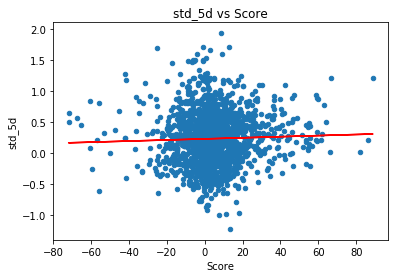

In [71]:
experiment_result('std_5d','Score',vol_indicator)

Correlation is : 0.036672337813159345


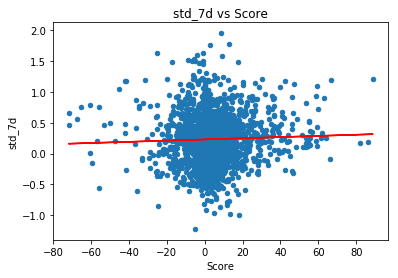

In [72]:
experiment_result('std_7d','Score',vol_indicator)

Correlation is : 0.02727555743490136


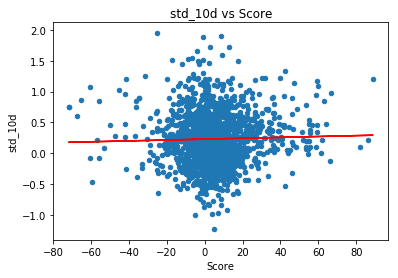

In [73]:
experiment_result('std_10d','Score',vol_indicator)

## Conclusion  3
From the experiment above, we can tell sentiment score has certain negative correlation with future volatility. Therefore, it makes sense for us to continue to improve the sentiment score as well as use it to do prediction for volatility.


# Simple price prediction using indicator

In the following section, we will use the indicator to do simple prediction for different time horizon. The logis is as following:

1. If the indicator sign is bigger or equal to zero, we predict positive return for each time horizon
2. Else, negaive for each time horizon

Define a function to give positive sign to data point bigger than zero and negative sign to data point smaller than zero

In [75]:
def give_sign (data):
    if data>=0:
        return 1
    else:
        return -1

In [78]:
def prediction(result,data):
    indi_1 = data['Score'].copy()
    sign_indi1 = indi_1.apply(give_sign)
    
    sign_return = data[result].apply(give_sign)
    same_result_1= sign_return*sign_indi1
    reverse_result_1 = -sign_indi1*sign_return
    
    print('Number of positive in '+ result+ " : "+str(round(sign_return.value_counts()[1]/float(len(sign_return)),6)))
    print('Number of negative in '+ result+ " : "+str(round(sign_return.value_counts()[-1]/float(len(sign_return)),6)))
    print('Accuracy for following the same sign of Indicator 1 ' + result+ " : "+str(round(same_result_1.value_counts()[1]/float(len(sign_return)),6)))
    print('Accuracy for following the reverse sign of Indicator 1 '+ result+ " : "+str(round(reverse_result_1.value_counts()[1]/float(len(sign_return)),6)))

In [79]:
prediction('return_1d',price_indicator_forward)

Number of positive in return_1d : 0.50873
Number of negative in return_1d : 0.49127
Accuracy for following the same sign of Indicator 1 return_1d : 0.497893
Accuracy for following the reverse sign of Indicator 1 return_1d : 0.502107


In [80]:
prediction('return_3d',price_indicator_forward)

Number of positive in return_3d : 0.487658
Number of negative in return_3d : 0.512342
Accuracy for following the same sign of Indicator 1 return_3d : 0.484046
Accuracy for following the reverse sign of Indicator 1 return_3d : 0.515954


In [81]:
prediction('return_5d',price_indicator_forward)

Number of positive in return_5d : 0.492474
Number of negative in return_5d : 0.507526
Accuracy for following the same sign of Indicator 1 return_5d : 0.490066
Accuracy for following the reverse sign of Indicator 1 return_5d : 0.509934


In [82]:
prediction('return_7d',price_indicator_forward)

Number of positive in return_7d : 0.494883
Number of negative in return_7d : 0.505117
Accuracy for following the same sign of Indicator 1 return_7d : 0.48525
Accuracy for following the reverse sign of Indicator 1 return_7d : 0.51475


In [83]:
prediction('return_10d',price_indicator_forward)

Number of positive in return_10d : 0.499097
Number of negative in return_10d : 0.500903
Accuracy for following the same sign of Indicator 1 return_10d : 0.493076
Accuracy for following the reverse sign of Indicator 1 return_10d : 0.506924


In [84]:
prediction('return_15d',price_indicator_forward)

Number of positive in return_15d : 0.506321
Number of negative in return_15d : 0.493679
Accuracy for following the same sign of Indicator 1 return_15d : 0.499097
Accuracy for following the reverse sign of Indicator 1 return_15d : 0.500903


In [85]:
prediction('return_20d',price_indicator_forward)

Number of positive in return_20d : 0.508128
Number of negative in return_20d : 0.491872
Accuracy for following the same sign of Indicator 1 return_20d : 0.499699
Accuracy for following the reverse sign of Indicator 1 return_20d : 0.500301


## Conclusion  4
From the experiment above, we can observe that there is certain predictive value in this sentiment score. However, instead of following our initial strategy, we should go for different direction of the sentiment score. Further investigation will be required for us to run more complex model in order to improve the prediction

In [87]:
price_indicator_forward

,Score,Date,LMCADY,return_1d,return_3d,return_5d,return_7d,return_10d,return_15d,return_20d
0,-4.453108,2016-11-30,5813.25,-0.434353,2.266374,-0.584871,0.150518,-1.677203,-5.375650,-4.992904
1,-12.761027,2016-11-29,5690.00,2.166081,1.195079,3.264499,1.603691,-0.219684,-3.541301,-3.866432
2,19.247140,2016-11-28,5865.75,-2.996207,-1.325491,1.351063,-1.474662,-1.956272,-6.465499,-5.694072
3,-14.800864,2016-11-25,5864.50,0.021315,-0.873902,-1.816012,0.191832,-0.724699,-4.002899,-6.969904
4,7.340450,2016-11-24,5853.50,0.187922,-2.793201,-1.118989,1.563167,-1.234304,-2.220893,-5.970787
5,-2.154932,2016-11-23,5724.50,2.253472,2.467464,1.550354,0.585204,0.956415,-0.152852,-3.908638
6,1.545121,2016-11-22,5597.00,2.278006,4.779346,1.661604,3.412542,4.980347,1.438271,-1.938539
7,1.244165,2016-11-21,5543.50,0.965094,5.592135,5.813114,4.866059,7.242717,3.743123,-1.028231
8,-0.894973,2016-11-18,5412.00,2.429786,5.774205,8.361050,5.136733,6.393200,7.575758,4.023466
9,-10.823097,2016-11-17,5485.25,-1.335399,2.037282,6.713459,6.936785,5.519347,5.396290,4.343467
